In [31]:
import pymol
from pymol import cmd
import os

folders = ["9.tim-cry2","17.tim-cry2-all","19.tim-cry2-all"]
location = "/mnt/d/from_desktop/alphafold_work/" + folder

list_of_interaction_folders = os.listdir(location)
# print(list_of_interaction_folders)
list_of_interaction_folders = ["aricia_artaxerxes_timelessxcry2","anthocharis_cardamines_timelessxcry2"]
# assert False
output = "File1,File2,RMSD"
for ori_folder1 in folders:
    location1 = "/mnt/d/from_desktop/alphafold_work/" + ori_folder1
    for folder1 in list_of_interaction_folders:
        print(folder1)
        species ="_".join (folder1.split("_")[:-1])
        species1 = species[0].upper()+species[1:]
        list_of_files_1 = os.listdir(f"{location1}/{folder1}")
        for file_name_ref in list_of_files_1:
            if file_name_ref.endswith("_B.pdb") and file_name_ref != 'chain_A.pdb':
                # break    
                for ori_folder2 in folders:
                    location2 = "/mnt/d/from_desktop/alphafold_work/" + ori_folder2
    
                    for folder2 in list_of_interaction_folders:
                        # if folder2 != folder1:
                        
                            # print(folder2)
                            species ="_".join (folder2.split("_")[:-1])
                            species2 = species[0].upper()+species[1:]
                            list_of_files_2 = os.listdir(f"{location2}/{folder2}")
                            for file_name in list_of_files_2:
                                if file_name.endswith("_B.pdb") and file_name != 'chain_A.pdb':
                                    cmd.reinitialize()
                                    cmd.load(f"{location1}/{folder1}/{file_name_ref}", 'reference')
                                    cmd.load(f"{location2}/{folder2}/{file_name}", file_name)
                                    alignment_result = cmd.align('reference',file_name)
                                    rmsd_value = alignment_result[0]
                                    # print(rmsd_value)
                                    # output += f"\n{folder},{folder},{file_name_ref.split('.')[0][-1]},{file_name.split('.')[0][-1]},{rmsd_value}"
                                    output += f"\n{species1}_{ori_folder1.split('.')[0]}_{file_name_ref.split('.')[0][-1]},{species2}_{ori_folder2.split('.')[0]}_{file_name.split('.')[0][-1]},{rmsd_value}"
                                    # print(output)
                                    # break
    print(output)      
# with open(f"/mnt/g/My Drive/Circadian Rhythm Genes Project/43.Alphafold_tim_cry2_across_species/2.Cry2_RMSD_across_species_1.csv",'w') as out_file:
#     out_file.write(output)

aricia_artaxerxes_timelessxcry2
anthocharis_cardamines_timelessxcry2
File1,File2,RMSD
Aricia_artaxerxes_9_0,Aricia_artaxerxes_9_0,0.0
Aricia_artaxerxes_9_0,Aricia_artaxerxes_9_1,0.5961261987686157
Aricia_artaxerxes_9_0,Aricia_artaxerxes_9_2,0.7585379481315613
Aricia_artaxerxes_9_0,Aricia_artaxerxes_9_3,1.1459193229675293
Aricia_artaxerxes_9_0,Aricia_artaxerxes_9_4,0.4712543189525604
Aricia_artaxerxes_9_0,Anthocharis_cardamines_9_0,40.310020446777344
Aricia_artaxerxes_9_0,Anthocharis_cardamines_9_1,36.100074768066406
Aricia_artaxerxes_9_0,Anthocharis_cardamines_9_2,33.26924133300781
Aricia_artaxerxes_9_0,Anthocharis_cardamines_9_3,0.9635772109031677
Aricia_artaxerxes_9_0,Anthocharis_cardamines_9_4,38.926578521728516
Aricia_artaxerxes_9_0,Aricia_artaxerxes_17_0,31.73990821838379
Aricia_artaxerxes_9_0,Aricia_artaxerxes_17_1,0.9503406286239624
Aricia_artaxerxes_9_0,Aricia_artaxerxes_17_2,40.52412033081055
Aricia_artaxerxes_9_0,Aricia_artaxerxes_17_3,1.974434494972229
Aricia_artaxerxes_9_0,

<Figure size 800x600 with 0 Axes>

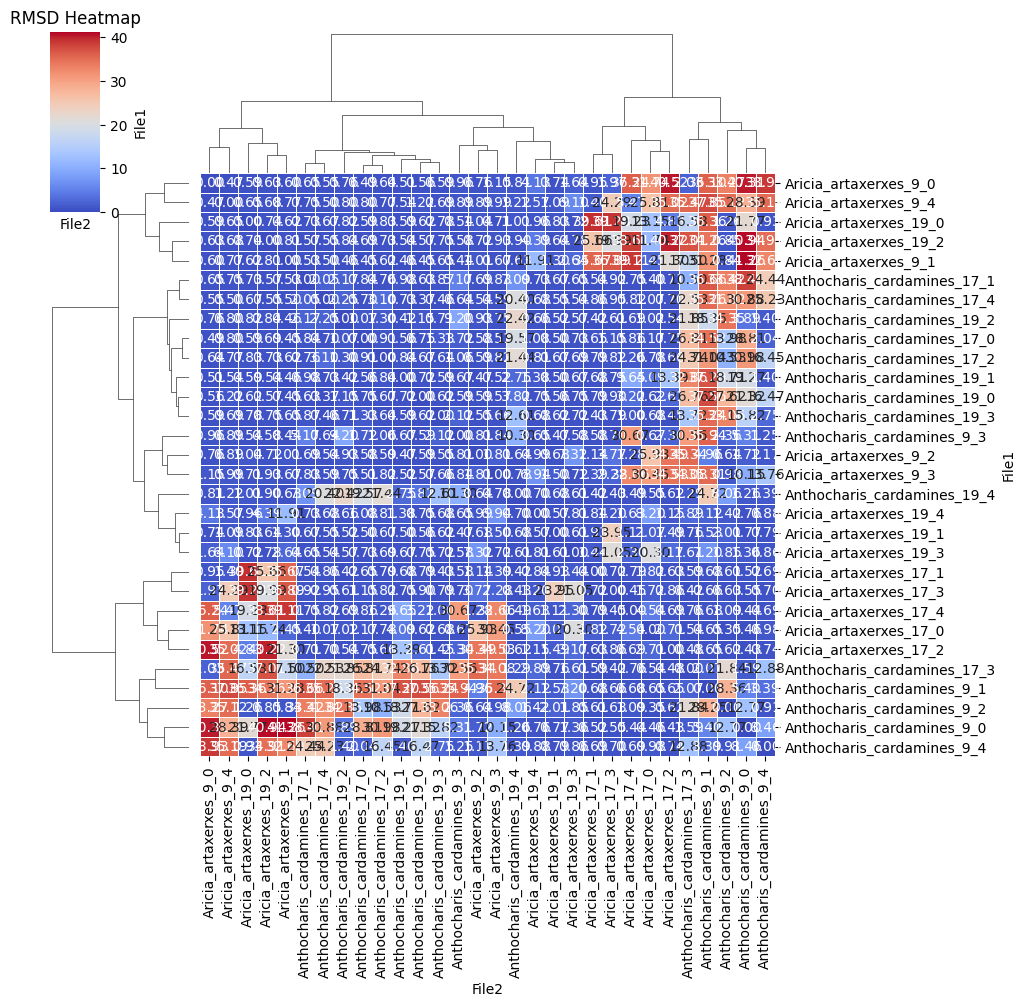

Cluster Assignments: {'Anthocharis_cardamines_17_0': 1, 'Anthocharis_cardamines_17_1': 1, 'Anthocharis_cardamines_17_2': 1, 'Anthocharis_cardamines_17_3': 2, 'Anthocharis_cardamines_17_4': 1, 'Anthocharis_cardamines_19_0': 1, 'Anthocharis_cardamines_19_1': 1, 'Anthocharis_cardamines_19_2': 1, 'Anthocharis_cardamines_19_3': 1, 'Anthocharis_cardamines_19_4': 1, 'Anthocharis_cardamines_9_0': 2, 'Anthocharis_cardamines_9_1': 2, 'Anthocharis_cardamines_9_2': 2, 'Anthocharis_cardamines_9_3': 1, 'Anthocharis_cardamines_9_4': 2, 'Aricia_artaxerxes_17_0': 2, 'Aricia_artaxerxes_17_1': 2, 'Aricia_artaxerxes_17_2': 2, 'Aricia_artaxerxes_17_3': 2, 'Aricia_artaxerxes_17_4': 2, 'Aricia_artaxerxes_19_0': 1, 'Aricia_artaxerxes_19_1': 1, 'Aricia_artaxerxes_19_2': 1, 'Aricia_artaxerxes_19_3': 1, 'Aricia_artaxerxes_19_4': 1, 'Aricia_artaxerxes_9_0': 1, 'Aricia_artaxerxes_9_1': 1, 'Aricia_artaxerxes_9_2': 1, 'Aricia_artaxerxes_9_3': 1, 'Aricia_artaxerxes_9_4': 1}


In [32]:
from io import StringIO
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv(StringIO(output))

# Pivot the data to a matrix format for heatmap
heatmap_data = df.pivot(index="File1", columns="File2", values="RMSD")

# Create the heatmap
plt.figure(figsize=(8, 6))
sns.clustermap(heatmap_data, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, method="ward")

# sns.heatmap(heatmap_data, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("RMSD Heatmap")
plt.xlabel("File2")
plt.ylabel("File1")
plt.show()

from scipy.cluster.hierarchy import linkage, dendrogram, fcluster
linkage_matrix = linkage(heatmap_data, method="ward")
num_clusters = 2
clusters = fcluster(linkage_matrix, num_clusters, criterion="maxclust")

# Map clusters to file indices
cluster_assignments = dict(zip(heatmap_data.index, clusters))
print("Cluster Assignments:", cluster_assignments)

In [33]:
for key in cluster_assignments:
    print(key,"\t", cluster_assignments[key])

Anthocharis_cardamines_17_0 	 1
Anthocharis_cardamines_17_1 	 1
Anthocharis_cardamines_17_2 	 1
Anthocharis_cardamines_17_3 	 2
Anthocharis_cardamines_17_4 	 1
Anthocharis_cardamines_19_0 	 1
Anthocharis_cardamines_19_1 	 1
Anthocharis_cardamines_19_2 	 1
Anthocharis_cardamines_19_3 	 1
Anthocharis_cardamines_19_4 	 1
Anthocharis_cardamines_9_0 	 2
Anthocharis_cardamines_9_1 	 2
Anthocharis_cardamines_9_2 	 2
Anthocharis_cardamines_9_3 	 1
Anthocharis_cardamines_9_4 	 2
Aricia_artaxerxes_17_0 	 2
Aricia_artaxerxes_17_1 	 2
Aricia_artaxerxes_17_2 	 2
Aricia_artaxerxes_17_3 	 2
Aricia_artaxerxes_17_4 	 2
Aricia_artaxerxes_19_0 	 1
Aricia_artaxerxes_19_1 	 1
Aricia_artaxerxes_19_2 	 1
Aricia_artaxerxes_19_3 	 1
Aricia_artaxerxes_19_4 	 1
Aricia_artaxerxes_9_0 	 1
Aricia_artaxerxes_9_1 	 1
Aricia_artaxerxes_9_2 	 1
Aricia_artaxerxes_9_3 	 1
Aricia_artaxerxes_9_4 	 1


In [26]:
threshold = 15  # Adjust based on dendrogram
clusters = fcluster(linkage_matrix, threshold, criterion="distance")
cluster_assignments = dict(zip(heatmap_data.index, clusters))
print("Cluster Assignments:", cluster_assignments)
for key in cluster_assignments:
    print(key,"\t", cluster_assignments[key])

Cluster Assignments: {'17_0': 12, '17_1': 10, '17_2': 13, '17_3': 11, '17_4': 14, '19_0': 3, '19_1': 4, '19_2': 1, '19_3': 5, '19_4': 6, '9_0': 7, '9_1': 2, '9_2': 8, '9_3': 7, '9_4': 9}
17_0 	 12
17_1 	 10
17_2 	 13
17_3 	 11
17_4 	 14
19_0 	 3
19_1 	 4
19_2 	 1
19_3 	 5
19_4 	 6
9_0 	 7
9_1 	 2
9_2 	 8
9_3 	 7
9_4 	 9


In [34]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu

# Creating a dummy dataset
np.random.seed(42)
data = pd.DataFrame({
    "Site1": np.random.choice([100, 200, 300, 400], size=20),
    "Site2": np.random.choice([250, 350, 450, 550], size=20),
    "Count1": np.random.randint(1, 10, size=20),
    "Count2": np.random.randint(1, 10, size=20),
    "Count3": np.random.randint(1, 10, size=20),
    "Condition": np.random.choice(["Diapause", "NonDiapause"], size=20)
})

# Splitting data based on Condition
diapause_counts = data[data["Condition"] == "Diapause"][["Count1", "Count2", "Count3"]]
non_diapause_counts = data[data["Condition"] == "NonDiapause"][["Count1", "Count2", "Count3"]]

# Applying t-test (or Mann-Whitney if non-normal)
for col in ["Count1", "Count2", "Count3"]:
    t_stat, p_val = ttest_ind(diapause_counts[col], non_diapause_counts[col], equal_var=False)
    u_stat, u_p_val = mannwhitneyu(diapause_counts[col], non_diapause_counts[col])
    print(f"{col} - t-test p-value: {p_val:.4f}, Mann-Whitney U p-value: {u_p_val:.4f}")

Count1 - t-test p-value: 0.5681, Mann-Whitney U p-value: 0.5378
Count2 - t-test p-value: 0.7895, Mann-Whitney U p-value: 0.8174
Count3 - t-test p-value: 0.3696, Mann-Whitney U p-value: 0.5621


In [37]:
non_diapause_counts

,Count1,Count2,Count3
0,3,8,2
2,4,1,8
4,3,2,9
7,7,2,7
8,5,6,9
9,9,6,8
11,2,6,8
14,2,4,1
15,9,8,8
18,4,8,1


In [40]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate dummy data
np.random.seed(42)
sites = [(100, 250), (200, 350), (300, 450), (400, 550)]
data = []

for site1, site2 in sites:
    for condition in ["Diapause", "NonDiapause"]:
        # Generate three replicates per condition
        for _ in range(3):
            count = np.random.randint(5, 15)
            data.append([site1, site2, count, condition])

# Convert to DataFrame
df = pd.DataFrame(data, columns=["Site1", "Site2", "Count", "Condition"])

# Fit a Linear Mixed-Effects Model
model = smf.mixedlm("Count ~ Condition", data=df, groups=df["Site1"], re_formula="1")
result = model.fit()

/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:

In [41]:
print(result.summary())

              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Count   
No. Observations:     24          Method:                 REML    
No. Groups:           4           Scale:                  6.3561  
Min. group size:      6           Log-Likelihood:         -54.0451
Max. group size:      6           Converged:              No      
Mean group size:      6.0                                         
------------------------------------------------------------------
                         Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                9.583    0.728 13.168 0.000  8.157 11.010
Condition[T.NonDiapause] 0.333    1.029  0.324 0.746 -1.684  2.351
Group Var                0.000    0.867                           



In [42]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf

# Generate dummy data
np.random.seed(42)
sites = [(100, 250), (200, 350), (300, 450), (400, 550)]
data = []

for site1, site2 in sites:
    for condition in ["Diapause", "NonDiapause"]:
        counts = np.random.randint(5, 15, size=3)  # Independent counts
        data.append([site1, site2, counts[0], counts[1], counts[2], condition])

df = pd.DataFrame(data, columns=["Site1", "Site2", "Count1", "Count2", "Count3", "Condition"])

# Convert data to long format
df_long = df.melt(id_vars=["Site1", "Site2", "Condition"], value_vars=["Count1", "Count2", "Count3"], 
                   var_name="Replicate", value_name="Count")

# Convert Site1 and Site2 to categorical variables
df_long["Site1"] = df_long["Site1"].astype("category")
df_long["Site2"] = df_long["Site2"].astype("category")

# Fit a Linear Mixed-Effects Model with both Site1 and Site2 as random effects
model = smf.mixedlm("Count ~ Condition", data=df_long, groups=df_long["Site1"], re_formula="1")
result = model.fit()

# Print results
print(result.summary())

/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with cg
  warnings.warn(


              Mixed Linear Model Regression Results
Model:                MixedLM     Dependent Variable:     Count   
No. Observations:     24          Method:                 REML    
No. Groups:           4           Scale:                  6.3561  
Min. group size:      6           Log-Likelihood:         -54.0451
Max. group size:      6           Converged:              No      
Mean group size:      6.0                                         
------------------------------------------------------------------
                         Coef. Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------------
Intercept                9.583    0.728 13.168 0.000  8.157 11.010
Condition[T.NonDiapause] 0.333    1.029  0.324 0.746 -1.684  2.351
Group Var                0.000    0.867                           



/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2206: ConvergenceWarning: MixedLM optimization failed, trying a different optimizer may help.
  warnings.warn(msg, ConvergenceWarning)
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2218: ConvergenceWarning: Gradient optimization failed, |grad| = 0.011285
  warnings.warn(msg, ConvergenceWarning)
/home/saurav/miniconda3/envs/genomic_work/lib/python3.11/site-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


In [43]:
df_long

,Site1,Site2,Condition,Replicate,Count
0,100,250,Diapause,Count1,11
1,100,250,NonDiapause,Count1,9
2,200,350,Diapause,Count1,7
3,200,350,NonDiapause,Count1,9
4,300,450,Diapause,Count1,12
5,300,450,NonDiapause,Count1,9
6,400,550,Diapause,Count1,10
7,400,550,NonDiapause,Count1,5
8,100,250,Diapause,Count2,8
9,100,250,NonDiapause,Count2,11


In [44]:
list_items = ["A"]
for item in list_items:
    print(item)

A
